<a href="https://colab.research.google.com/github/OsbornOuO/ml_virtual_currency/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finlab_crypto > log.txt

In [2]:
import finlab_crypto

finlab_crypto.setup()

In [3]:
ohlcv = finlab_crypto.crawler.get_all_binance("BTCUSDT",'4h')

All caught up..!


In [4]:
ohlcv.head()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865,1.502957e+12,3.531943e+05,334.0,64.013727,275647.421911,8048.127886
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882,1.502971e+12,2.825012e+05,248.0,58.787633,261054.051154,8020.698096
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001,1.502986e+12,7.742388e+05,858.0,125.184133,555419.758061,8133.190658
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716,1.503000e+12,9.652911e+05,986.0,165.036363,707808.200922,8425.112852
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.503014e+12,1.079545e+06,1001.0,203.226685,878286.968557,8733.911395


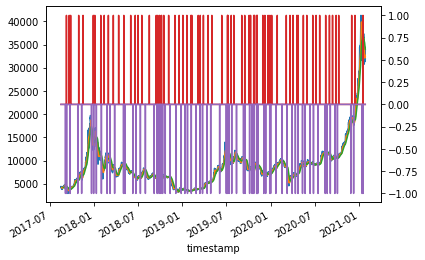

In [5]:
close = ohlcv.close
sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

close.plot()
sma20.plot()
sma60.plot()

entries.astype(int).plot(secondary_y=True)
(-exits.astype(int)).plot(secondary_y=True)

In [6]:
import vectorbt as vbt

portfolio = vbt.Portfolio.from_signals(close,entries,exits,freq='4h')

In [7]:
portfolio.annual_returns()

2017-08-17 00:00:00+00:00    1.116545
2018-08-17 00:00:00+00:00    0.503404
2019-08-17 00:00:00+00:00   -0.218770
2020-08-16 00:00:00+00:00    0.995449
Freq: 365D, Name: close, dtype: float64

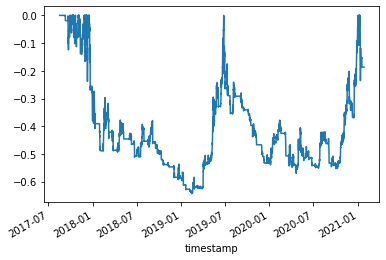

In [8]:
portfolio.drawdown().plot()

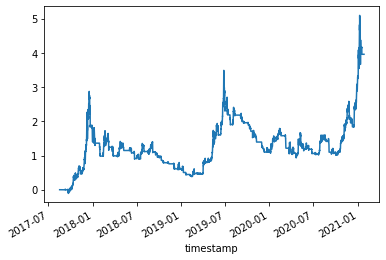

In [9]:
portfolio.cumulative_returns().plot()

In [10]:
portfolio.positions().records

,col,size,entry_idx,entry_price,entry_fees,exit_idx,exit_price,exit_fees,pnl,return,status
0,0,0.023527,136,4246.25201,0.099900,140,4249.44630,0.099975,-0.124724,-0.001247,1
1,0,0.025377,204,3931.69777,0.099776,225,3776.22000,0.095830,-4.141197,-0.041464,1
2,0,0.024191,240,3953.39945,0.095638,417,5684.30001,0.137511,41.639834,0.434953,1
3,0,0.022531,440,6091.08500,0.137237,513,6500.47302,0.146460,8.940119,0.065079,1
4,0,0.019661,547,7434.42700,0.146168,758,14686.23906,0.288745,142.142569,0.971490,1
...,...,...,...,...,...,...,...,...,...,...,...
67,0,0.019241,6809,10785.02425,0.207512,6841,10517.22225,0.202360,-5.562592,-0.026779,1
68,0,0.018515,6873,10907.85696,0.201955,7172,16772.58063,0.310539,108.070877,0.534588,1
69,0,0.015865,7195,19535.14563,0.309918,7243,17906.14593,0.284075,-26.437498,-0.085220,1
70,0,0.014770,7276,19195.05588,0.283507,7453,34951.91310,0.516233,231.925862,0.817243,1


In [11]:
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(20).mean()
  sma60 = close.rolling(60).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
  return entries,exists

In [12]:
import numpy as np

np.arange(20,310,10)

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290, 300])

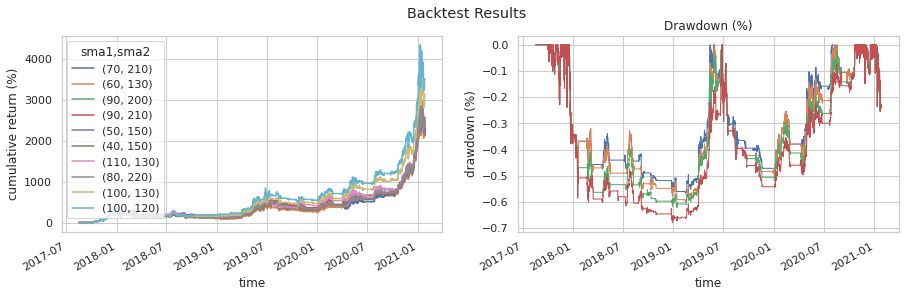

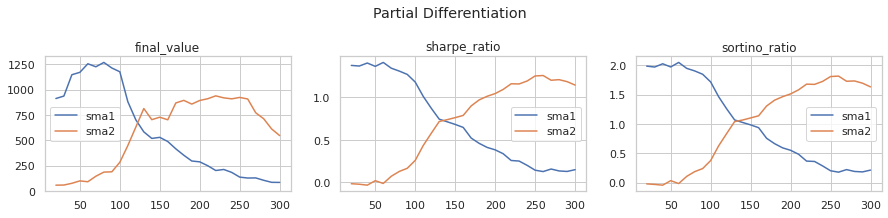

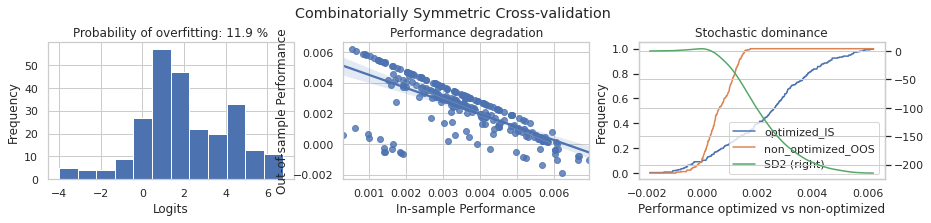

Output()

In [13]:
from finlab_crypto import Strategy


@Strategy(sma1=20,sma2=60)
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sma_strategy.sma1).mean()
  sma60 = close.rolling(sma_strategy.sma2).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  figures = {
      'overlaps':{
          'sma20':sma20,
          'sma60':sma60
      }
  }
  return entries,exits,figures

variables = {
    'sma1':np.arange(20,310,10),'sma2':np.arange(20,310,10)
}
portfolio = sma_strategy.backtest(ohlcv,variables=variables, freq='4h', plot=True)